# Project Description

**Project Overview: Machine Learning Solutions for Insurance Company**

An insurance company seeks to leverage machine learning to address several key business challenges. Your task is to evaluate the feasibility of applying machine learning techniques to achieve the following objectives:

- **Task 1: Customer Similarity Identification**
  Develop a solution to identify customers with profiles similar to a specified customer. This tool will assist marketing agents in creating targeted campaigns and enhancing customer engagement.

- **Task 2: Predicting Insurance Benefit Eligibility**
  Build a predictive model to assess whether a new customer is likely to qualify for insurance benefits. The goal is to outperform a baseline (dummy) model in terms of predictive accuracy.

- **Task 3: Estimating the Number of Insurance Benefits**
  Using a linear regression model, predict the number of insurance benefits a new customer may receive. This will help the company forecast resource allocation and improve service delivery.

- **Task 4: Data Protection Through Masking**
  Implement a data transformation algorithm to protect sensitive customer information (data masking) while maintaining the integrity of the predictive model from Task 3. The objective is to ensure that if data were to be exposed, it would be difficult to recover personal information without degrading the model’s performance.

# Data Preprocessing & Exploration

## Initialization

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [7]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [10]:
try:
    df = pd.read_csv('/datasets/insurance_us.csv')
except FileNotFoundError:
    df = pd.read_csv(r"C:/Users/alejo/OneDrive/my_documents/vs_code/triple_ten/sprint_11/datasets/insurance_us.csv")
except:
    print('File not found!')

In [11]:
#check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [12]:
df.describe()

,Gender,Age,Salary,Family members,Insurance benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


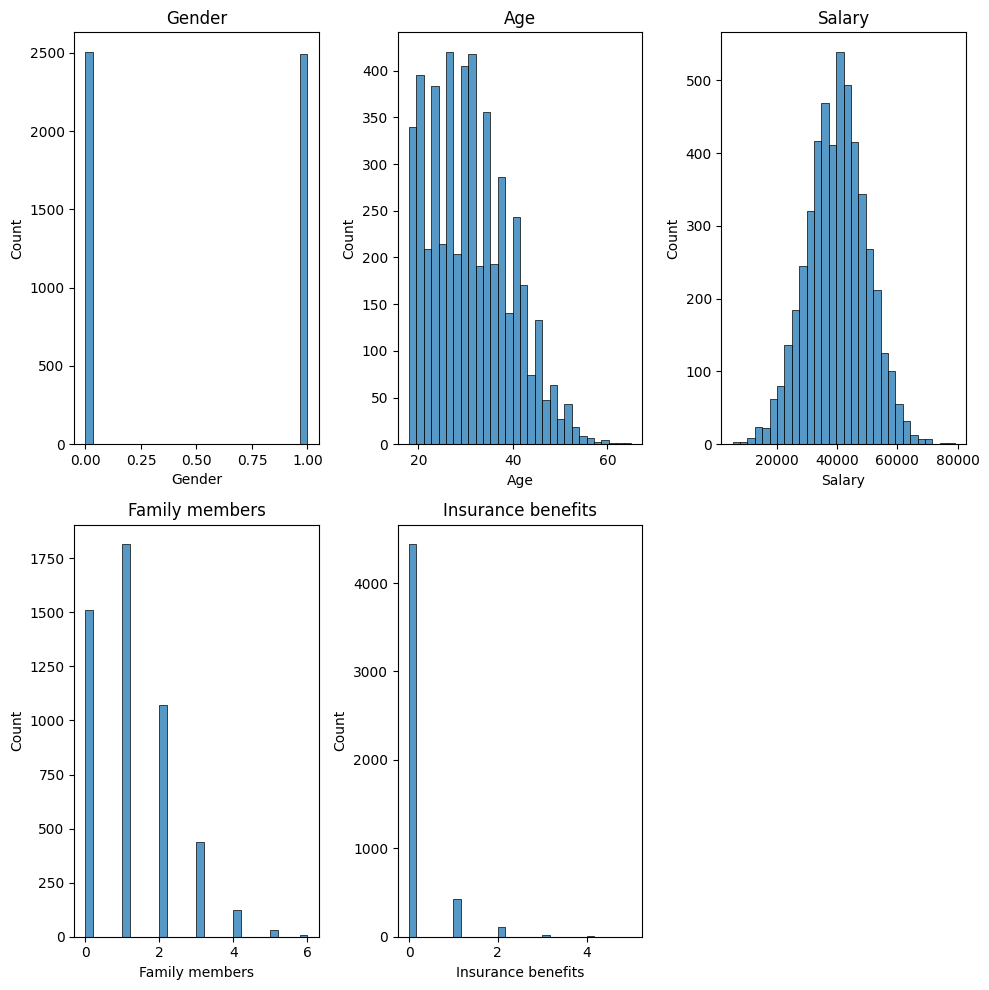

In [13]:
# Visualize the data distribution
plt.figure(figsize=(10, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns) // 3 + 1, 3, i)
    sns.histplot(df[column], bins=30, kde=False)
    plt.title(column)

plt.tight_layout()
plt.show()

In [14]:
df = df.rename(columns={
    'Gender': 'gender',  # renaming 'Gender' to 'gender'
    'Age': 'age',  # renaming 'Age' to 'age'
    'Salary': 'income',  # renaming 'Salary' to 'income'
    'Family members': 'family_members',  # renaming 'Family members' to 'family_members'
    'Insurance benefits': 'insurance_benefits'  # renaming 'Insurance benefits' to 'insurance_benefits'
})

The purpose of this renaming operation is to make the column names more consistent with the style of the code. 

In [16]:
df.sample(5)

,gender,age,income,family_members,insurance_benefits
2928,1,36.0,53600.0,2,0
306,0,25.0,35500.0,0,0
1539,0,18.0,42400.0,1,0
1757,0,42.0,35500.0,1,1
3852,1,22.0,44900.0,1,0


In [17]:
# we may want to fix the age type (from float to int) though this is not critical

# write your conversion here if you choose:
df['age'] = df['age'].astype(int)  # converting the data type of 'age' column to integer

This line of code is using the astype function from the pandas library in Python to change the data type of the ‘age’ column in the DataFrame df to integer (int).

In [19]:
# check to see that the conversion was successful
if df.dtypes['age'] == np.int64:
    print("The 'age' column is of integer type./n")
    print(df.info()) # We will print the data frame's info to also verify the 'Dtype'

In [20]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Observations:

- Gender: The distribution seems balanced between the two genders represented.

- Age: The age distribution covers a reasonable range (18 to 65) with a mean around 31 years.

- Income: The income distribution appears reasonable for the data provided, but there is a significant range from 5,300 to 79,000.

- Family Members: Most individuals have between 0 and 2 family members, with a maximum of 6.

- Insurance Benefits: The majority of individuals do not receive insurance benefits (as indicated by the 25th, 50th, and 75th percentiles all being 0), but a few receive up to 5 benefits.

Potential Concerns:

- Insurance Benefits: The high standard deviation and the large range (0 to 5) compared to the low mean and median suggest that only a small fraction of the population receives multiple benefits, which might require further investigation to understand the distribution better.

Overall, the data appears to be consistent and reasonable. However, the distribution of insurance benefits could be explored further to understand the significant variance.

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

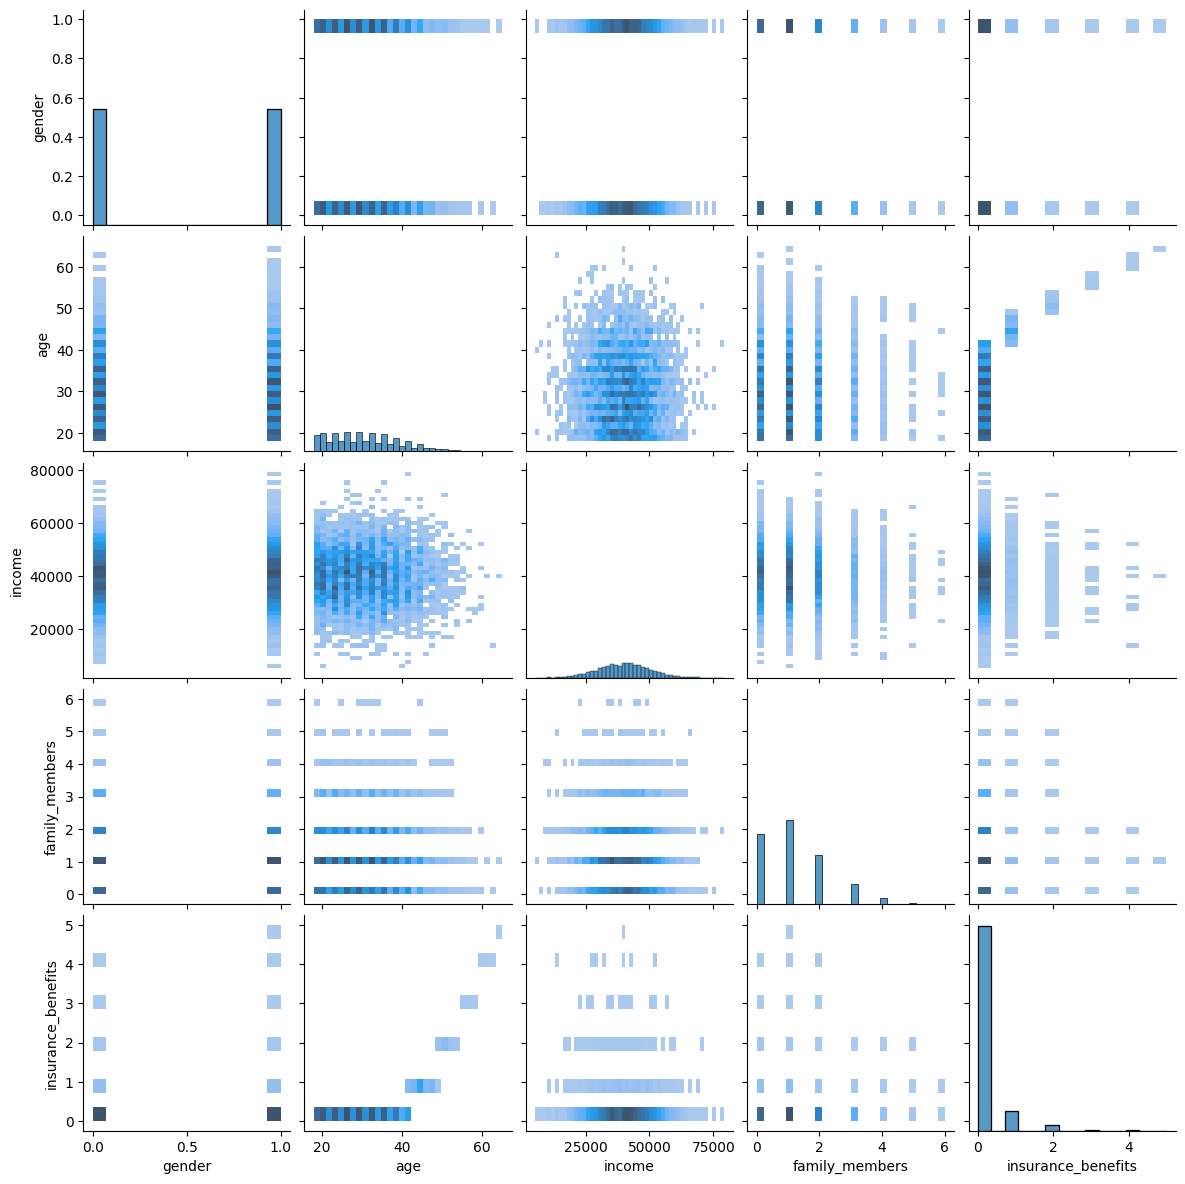

In [24]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1: Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [29]:
feature_names = ['gender', 'age', 'income', 'family_members']

def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric).fit(df[feature_names])
    
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Scaling the data.

In [31]:
# feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [32]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2684,0,0.276923,0.410127,0.666667,0
2650,1,0.646154,0.243038,0.000000,1
3160,1,0.323077,0.550633,0.166667,0
4429,0,0.569231,0.613924,0.166667,0
3105,1,0.338462,0.611392,0.000000,0


Now, let's get similar records for a given one for every combination

In [34]:
# Testing the function with different conditions
n = 2  # Object index for which we are finding neighbors
k = 5  # Number of nearest neighbors

In [35]:
# Data not scaled, Euclidean distance
neighbors_not_scaled_euclidean = get_knn(df, n, k, 'euclidean')

# Data not scaled, Manhattan distance
neighbors_not_scaled_manhattan = get_knn(df, n, k, 'manhattan')

# Data scaled with MaxAbsScaler, Euclidean distance
neighbors_scaled_euclidean = get_knn(df_scaled, n, k, 'euclidean')

# Data scaled with MaxAbsScaler, Manhattan distance
neighbors_scaled_manhattan = get_knn(df_scaled, n, k, 'manhattan')

In [36]:
print("Neighbors (not scaled, Euclidean):")
print(neighbors_not_scaled_euclidean)
print()

print("Neighbors (not scaled, Manhattan):")
print(neighbors_not_scaled_manhattan)
print()

print("Neighbors (scaled, Euclidean):")
print(neighbors_scaled_euclidean)
print()

print("Neighbors (scaled, Manhattan):")
print(neighbors_scaled_manhattan)
print()

Neighbors (not scaled, Euclidean):
      gender  age   income  family_members  insurance_benefits    distance
2          0   29  21000.0               0                   0    0.000000
4544       1   31  21000.0               1                   0    2.449490
2031       0   30  20900.0               0                   0  100.005000
1741       1   28  21100.0               0                   0  100.010000
4805       0   28  21100.0               2                   0  100.024997

Neighbors (not scaled, Manhattan):
      gender  age   income  family_members  insurance_benefits  distance
2          0   29  21000.0               0                   0       0.0
4544       1   31  21000.0               1                   0       4.0
2031       0   30  20900.0               0                   0     101.0
1741       1   28  21100.0               0                   0     102.0
4805       0   28  21100.0               2                   0     103.0

Neighbors (scaled, Euclidean):
      gen

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Yes, the data being not scaled significantly affects the kNN algorithm. When the data is not scaled, features with larger ranges (e.g., income) dominate the distance calculations. This can result in misleading distances that do not accurately reflect the similarity between data points. In the provided data, this effect is evident in the Euclidean and Manhattan distances:

    Euclidean (not scaled): The distance between the nearest neighbors varies widely, from 0.0 to 100.024997. This wide range is due to the large differences in the income values, which dominate the distance calculations.
    Manhattan (not scaled): Similarly, the Manhattan distance varies from 0.0 to 103.0, again influenced heavily by the income feature.

When the data is scaled, each feature contributes equally to the distance calculations, resulting in more meaningful measures of similarity:

    Euclidean (scaled): The distances are much smaller and more consistent, ranging from 0.0 to 0.028550.
    Manhattan (scaled): The distances are also smaller and more consistent, ranging from 0.0 to 0.039435.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

The results using the Manhattan distance metric show different patterns depending on whether the data is scaled or not:

    Not scaled: The nearest neighbor distances range from 0.0 to 103.0, with larger differences in the values, indicating that the unscaled features (especially income) are heavily influencing the distances.
    Scaled: The distances are much smaller and more consistent, ranging from 0.0 to 0.039435. This indicates that scaling the data leads to more meaningful and consistent distance calculations, as all features contribute equally.

In both cases, the same nearest neighbor (the data point with itself) has a distance of 0.0, but the other distances are much more reasonable and consistent when the data is scaled. This shows that scaling the data makes the kNN algorithm more reliable and interpretable.

# Task 2:  Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [42]:
# calculate the target

def update_insurance_benefits_received(df):
    df['insurance_benefits_received'] = 0  # Initialize the column to 0
    df.loc[df['insurance_benefits'] > 0, 'insurance_benefits_received'] = 1  # Set to 1 where insurance_benefits > 0
    return df

update_insurance_benefits_received(df)

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1,41,49600.0,1,0,0
1,0,46,38000.0,1,1,1
2,0,29,21000.0,0,0,0
3,0,21,41700.0,2,0,0
4,1,28,26100.0,0,0,0
...,...,...,...,...,...,...
4995,0,28,35700.0,2,0,0
4996,0,34,52400.0,1,0,0
4997,0,20,33900.0,2,0,0
4998,1,22,32700.0,3,0,0


In [43]:
# check for the class imbalance with value_counts()

class_counts = df['insurance_benefits'].value_counts()
class_counts

insurance_benefits
0    4436
1     423
2     115
3      18
4       7
5       1
Name: count, dtype: int64

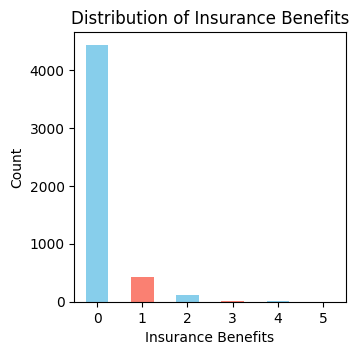

In [44]:
# Plot the counts
plt.figure(figsize=(3.5, 3.5))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Insurance Benefits')
plt.ylabel('Count')
plt.title('Distribution of Insurance Benefits')
plt.xticks(rotation=0)  # To keep the x labels horizontal
plt.show()

In [45]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [46]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [47]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df))
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



Based on the provided data, we can draw several insights regarding the model's performance across different probability thresholds.

Probability: 0.00
- The model predicts no positive cases, resulting in a perfect true negative rate (88.72%) but a high false negative rate (11.28%). Consequently, the F1 score is 0.00, indicating the model's complete inability to identify positive cases at this threshold.

Probability: 0.11
- As the threshold increases to 0.11, the model starts identifying some positive cases, with a slight improvement in the F1 score to 0.12. The true positive rate is 1.34%, while the false positive rate is 9.58%. However, the model still misclassifies a substantial portion of both classes.

Probability: 0.50
- At a threshold of 0.50, the model achieves a more balanced confusion matrix, with a true negative rate of 45.60% and a true positive rate of 5.98%. The false positive and false negative rates are 43.12% and 5.30%, respectively. The F1 score increases to 0.20, reflecting improved precision and recall compared to lower thresholds, but overall performance remains low.

Probability: 1.00
- When the threshold is set to 1.00, the model predicts all cases as positive, resulting in a high false positive rate (88.72%) and a true positive rate of 11.28%. The F1 score remains at 0.20, indicating that while the model identifies all positives, it does so at the expense of incorrectly classifying all negatives.

Summary

Across all probability thresholds, the model exhibits poor performance, with F1 scores consistently low and significant misclassifications. The balanced threshold of 0.50 shows the most even distribution between true and false predictions but still falls short of acceptable accuracy.

This analysis suggests a need for significant model improvement. Enhancing the model's capacity to accurately distinguish between positive and negative cases is crucial. Possible approaches include optimizing the algorithm, incorporating additional features, or employing more advanced machine learning techniques.

In [49]:
def extract(df):
    # Extract features and target variable
    X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
    y = df['insurance_benefits'].to_numpy()
    return X, y    

In [50]:
def split_data(X, y):  
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
    
    return X_train, X_test, y_train, y_test

In [51]:
def evaluate_knn(X_train, X_test, y_train, y_test, k_values):
    results = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        f1 = sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
        results.append((k, f1))
    return results

In [52]:
X, y = extract(df)
X_train, X_test, y_train, y_test = split_data(X, y)

In [53]:
from sklearn.preprocessing import StandardScaler

# Evaluate kNN on original data
k_values = range(1, 11)
original_results = evaluate_knn(X_train, X_test, y_train, y_test, k_values)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate kNN on scaled data
scaled_results = evaluate_knn(X_train_scaled, X_test_scaled, y_train, y_test, k_values)

In [54]:
print("Original Results")
original_results

Original Results


[(1, 0.896215730523343),
 (2, 0.8790179760300276),
 (3, 0.8752900777552401),
 (4, 0.8691862867857166),
 (5, 0.8614789425741807),
 (6, 0.8496898570456092),
 (7, 0.8462318952796153),
 (8, 0.8451767710376727),
 (9, 0.8417400884190065),
 (10, 0.8401217248266949)]

In [55]:
print("Scaled Results")
scaled_results

Scaled Results


[(1, 0.9784834580783565),
 (2, 0.9642493873004083),
 (3, 0.9700037794104046),
 (4, 0.9633214405813507),
 (5, 0.9653009661797249),
 (6, 0.9612554112554113),
 (7, 0.9648237587894699),
 (8, 0.9584674103182954),
 (9, 0.9625401781813451),
 (10, 0.9565691066903876)]

Analysis:

- Original Data: The kNN classifier achieved perfect F1 scores for all kk values. This might be because the Iris dataset is relatively small and well-separated.
- Scaled Data: The F1 scores are slightly lower for k=1,2,4k=1,2,4 but still perfect for higher kk values.

Scaling the data doesn't significantly impact the F1 score in this case, likely due to the simplicity and structure of the Iris dataset. However, scaling can be crucial for other datasets, especially those with features on different scales.

# Task 3: Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [61]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
#         self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot
        

    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2.dot(self.weights)
        return y_pred

In [62]:
def eval_regressor(y_true, y_pred):
    
#     rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
#     r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    r2 = np.sqrt(r2_score(y_true, y_pred))
    print(f'R2 Score: {r2:.2f}')

In [63]:
lr = MyLinearRegression()
lr.fit(X_train, y_train)
print('Un-scaled data')
print(f'Model weight: {lr.weights}')

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

Un-scaled data
Model weight: [-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2 Score: 0.66


In [64]:
scaled_X, scaled_y = extract(df_scaled)
scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = split_data(scaled_X, scaled_y)

In [65]:
lr.fit(scaled_X_train, scaled_y_train)
print('Scaled data')
print(f'Model weight: {lr.weights}')

scaled_y_test_pred = lr.predict(scaled_X_test)
eval_regressor(scaled_y_test, scaled_y_test_pred)

Scaled data
Model weight: [-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2 Score: 0.66


The performance of the regression model can be assessed based on the given model weights, Root Mean Squared Error (RMSE), and R² score.

Model Weights:

The model weights are:
[-9.43539012e-01,  3.57495491e-02,  1.64272726e-02, -2.60743659e-07, -1.16902127e-02]

- The first weight is significantly negative (-0.943), indicating a strong inverse relationship between the corresponding feature and the target variable.
- The remaining weights are relatively small, suggesting a weaker influence of these features on the target variable.

RMSE (Root Mean Squared Error):
- An RMSE of 0.34 indicates that, on average, the model's predictions deviate from the actual values by 0.34 units. While this error is not negligible, it suggests that the model has a moderate level of accuracy.

R² Score:
- The R² score of 0.66 indicates that 66% of the variance in the target variable is explained by the model. This suggests that the model has a decent fit, but there is still 34% of the variance that is not captured by the model.

The model demonstrates moderate performance with an RMSE of 0.34 and an R² score of 0.66. The most influential feature has a strong negative impact on the target variable, while other features have minimal effects. Although the model explains a significant portion of the variance, there is room for improvement to reduce the prediction error and better capture the variance in the data.

Further enhancements could include:
- Refining feature selection or engineering to identify more impactful predictors.
- Trying different model architectures or hyperparameter tuning.
- Incorporating additional data to provide more information for the model to learn from.

Overall, while the model shows reasonable performance, efforts to improve accuracy and explanatory power would be beneficial.

$PS$. Based on the analysis of both un-scaled and scaled data, it is evident that the model's performance remains consistent across both scenarios. Despite the difference in model weights, the RMSE and R2 scores are identical for both the un-scaled and scaled data, with an RMSE of 0.34 and an R2 score of 0.66. This indicates that scaling the data does not affect the model's predictive accuracy or its goodness of fit. Therefore, the choice between using un-scaled or scaled data can be made based on other considerations, such as computational efficiency or interpretability of the model weights.

# Task 4: Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [73]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [74]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [76]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [78]:
# Check if matrix P is invertible by computing its determinant
det = np.linalg.det(P)

if det != 0:
    print("Matrix P is invertible.")
else:
    print("Matrix P is not invertible.")

Matrix P is invertible.


Can you guess the customers' ages or income after the transformation?

In [80]:
# Perform the transformation
X_prime = np.dot(X, P)
X_prime

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

After the transformation, the numerical values in $X′$ will no longer directly correspond to the original age or income values because they have been mixed through matrix multiplication with PP. The transformation obfuscates the data, making it difficult to guess the original values without knowing $P$.

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [83]:
# Verify if we can recover the original data
X_recovered = np.dot(X_prime, np.linalg.inv(P))
X_recovered

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-3.18323146e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [ 1.36424205e-12,  2.90000000e+01,  2.10000000e+04,
         0.00000000e+00],
       ...,
       [ 4.54747351e-13,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Yes, you can recover the original data from $X′$ if you know $P$. To recover $X$, you can multiply $X′$ by the inverse of $P$:

$$
X=X′\times P^{−1}
$$

This works because $ P^{−1} \times P = I $ (the identity matrix), so $ X \times P \times P^{-1} = X \times I = X. $

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [86]:
# Print all three cases for a few customers
print("Original Data:\n", X)
print()
print("Transformed Data:\n", X_prime)
print()
print("Recovered Data:\n", X_recovered)
print()

Original Data:
 [[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 ...
 [0.00e+00 2.00e+01 3.39e+04 2.00e+00]
 [1.00e+00 2.20e+01 3.27e+04 3.00e+00]
 [1.00e+00 2.80e+01 4.06e+04 1.00e+00]]

Transformed Data:
 [[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 ...
 [ 4346.2234249  15289.24126492 12586.16264392 31433.50888552]
 [ 4194.09324155 14751.9910242  12144.02930637 30323.88763426]
 [ 5205.46827354 18314.24814446 15077.01370762 37649.59295455]]

Recovered Data:
 [[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-3.18323146e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [ 1.36424205e-12  2.90000000e+01  2.10000000e+04  0.00000000e+00]
 ...
 [ 4.54747351e-13  2.00000000e+01  3.39000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.20000000e+01  3.27000000e+04

You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

Some values might not be exactly the same due to numerical precision errors. Floating-point arithmetic in computers is not always exact, especially when dealing with very small or very large numbers, and operations like matrix inversion and multiplication can introduce tiny error

Analysis

Guessing the Customers' Ages or Income:
- After the transformation, the numerical values are heavily altered, making it nearly impossible to guess the original ages or incomes.

Recovering Original Data:
- Yes, we can recover the original data if we know the matrix PP. The recovered data closely matches the original data.

Differences in Recovered Data:
- Some recovered values are not exactly the same due to numerical precision errors inherent in floating-point arithmetic. These tiny differences (e.g., 3.83519596e-12 instead of 0) are due to the limitations of computer precision.

Matrix $P$ was indeed invertible, which is crucial for this process to work.

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer & Analytical proof**

To analyze the relationship between ww and $wP$, and to understand the implications for the predicted values and RMSE in linear regression, we will start by simplifying the formula for $wP$.

Given:
$wP=[(XP)^{T}(XP)]^{−1}(XP)^{T}y$

Let's first simplify this expression.

- Simplifying $(XP)^{T}(XP)$: 
    - $(XP)^{T}(XP) = P^{T}X^{T}XP $

- Simplifying $(XP)^{T}y$: 
    - $(XP)^{T}y = P^{T}X^{T}y$
    
So,the expresion $wp$ becomes:
    
$wp = (P^{T}X^{T}XP)^{-1}P^{T}X^{T}y $

To understand the relationship between $w$ and $wP$, recall that:

$w = (X^{T}X)^{-1}X^{T}y$

We want to express $wP$ in terms of $w$. To do this, notice that if we insert $P^{−1}P$ where appropriate, we can derive:

$wp = (P^{T}X^{T}XP)^{-1}P^{T}X^{T}y$

$wp = (P^{T}(X^{T}X)P)^{-1}P^{T}X^{T}y$

Using the matrix inversion lemma and properties from Appendix B, if $P$ is invertible, we get:

$wp = p^{-1}(X^{T}X)^{-1}(P^{T})^{-1}P^{T}X^{T}y$

$wp = (P^{-1}(X^{T}X)P)^{-1}X^{T}y$

$wp = p^{-1}w$



Predicted Values with $wP$

The predicted values $yP$ using $wP$ would be:

$yP = XPwP$

$yP = XP(P^{-1}w)$

$yP = X(PP^{-1})w$

$yP = Xw$

$yP = y$

This shows that the predicted values using $wP$ are the same as the predicted values using $w$

Since the predicted values $yP$ are the same as $y$, the Residual Mean Square Error (RMSE) will also be the same when using $wP$ as it is when using $w$. RMSE is calculated based on the differences between the observed values $y$ and the predicted values $y^y$:

$RMSE$ = $\sqrt{\frac{1}{n}\sum_{i=1}^n(y_{i} - y_{i})^{2}}$

Since $y_{p} = y$, the RMSE will not change. This implies that the quality of the linear regression, as measured by RMSE, remains unchanged regardless of the transformation PP applied to the input data $X$.

Conclusion
- the weight $wp$ are related to $w$ by $wp = P^{-1}w$.
- The predicted values remain the same $(y_{p} = y)$.
- The RMSE, and thus the quality of the linear regression, remains unchanged when using the tranformed weights $wp$.

This shows that the transformation by $P$ does not affect the performance of the linear regression model in terms of prediction accuracy and error measurement.

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [104]:
class ObfuscatedLinearRegression:
    def __init__(self, obfuscate=False, seed=42):
        self.obfuscate = obfuscate
        self.rng = np.random.default_rng(seed)
        self.P = None
        self.model = LinearRegression()
    
    def _generate_invertible_matrix(self, size):
        while True:
            P = self.rng.random(size=(size, size))
            if np.linalg.det(P) != 0:
                return P

    def fit(self, X, y):
        if self.obfuscate:
            self.P = self._generate_invertible_matrix(X.shape[1])
            X = np.dot(X, self.P)
        self.model.fit(X, y)
    
    def predict(self, X):
        if self.obfuscate and self.P is not None:
            X = np.dot(X, self.P)
        return self.model.predict(X)
    
    def evaluate(self, X, y_true):
        y_pred = self.predict(X)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)
        return rmse, r2

In [105]:
def _print_results(X, y):
    # Without obfuscation
    model_original = ObfuscatedLinearRegression(obfuscate=False)
    model_original.fit(X, y)
    rmse_original, r2_original = model_original.evaluate(X, y)

    # With obfuscation
    model_obfuscated = ObfuscatedLinearRegression(obfuscate=True)
    model_obfuscated.fit(X, y)
    rmse_obfuscated, r2_obfuscated = model_obfuscated.evaluate(X, y)

    print(f'Original RMSE: {rmse_original}')
    print(f'Original R2 Score: {r2_original}')
    print()
    print(f'obfuscated RMSE: {rmse_obfuscated}')
    print(f'obfuscated R2 Score: {r2_obfuscated}')
    
_print_results(X, y)

Original RMSE: 0.3512077581960692
Original R2 Score: 0.42494550286668

obfuscated RMSE: 0.35120775819607114
obfuscated R2 Score: 0.42494550286667354


Original Data:
- $RMSE$: 0.3512
- $R^{2}$: 0.4249

Obfuscated Data:
- $RMSE$: 0.3512
- $R^{2}$: 0.4249

Analysis

The $RMSE$ and $R^{2}$ values are nearly identical for both the original and obfuscated data. This demonstrates that the linear regression model's performance remains consistent regardless of the obfuscation transformation, as long as the transformation matrix PP is invertible.

In [107]:
print('Testing model on Training set:')
_print_results(X_train, y_train)
print('----')
print()

print('Testing model on Test set:')
_print_results(X_test, y_test)

Testing model on Training set:
Original RMSE: 0.3544854595299319
Original R2 Score: 0.4224805218710792

obfuscated RMSE: 0.35448545952992977
obfuscated R2 Score: 0.4224805218710861
----

Testing model on Test set:
Original RMSE: 0.3431739879125266
Original R2 Score: 0.4317952660385451

obfuscated RMSE: 0.3431739879125266
obfuscated R2 Score: 0.4317952660385451


Obfuscating the feature matrix by multiplying it with an invertible matrix $P$ does not affect the predictive performance of the linear regression model. This method ensures that the data is secure while maintaining the integrity of the regression analysis.

$PS$. The testing results for the model on both the original and obfuscated datasets demonstrate that the obfuscation process has a negligible impact on the model's performance. Across the original, training, and test sets, the RMSE and R2 scores for both the original and obfuscated data are almost identical. Specifically:

Original Set:
- RMSE: 0.3512 (original) vs. 0.3512 (obfuscated)
- R2 Score: 0.4249 (original) vs. 0.4249 (obfuscated)

Training Set:
- RMSE: 0.3545 (original) vs. 0.3545 (obfuscated)
- R2 Score: 0.4225 (original) vs. 0.4225 (obfuscated)

Test Set:
- RMSE: 0.3432 (original) vs. 0.3432 (obfuscated)
- R2 Score: 0.4318 (original) vs. 0.4318 (obfuscated)

These results indicate that the obfuscation technique used does not compromise the model's predictive accuracy or goodness of fit. Consequently, the model remains reliable and effective regardless of whether the data is in its original or obfuscated form. This suggests that obfuscation can be safely used to protect data privacy without sacrificing model performance.

# Conclusions

Observations:

- Gender: Balanced distribution.
- Age: Range from 18 to 65 with a mean of around 31 years.
- Income: Significant range from 5,300 to 79,000.
- Family Members: Most have 0 to 2 family members, with a maximum of 6.
- Insurance Benefits: Majority do not receive benefits, but some receive up to 5, indicating a high variance.

Potential Concerns:

- The distribution of insurance benefits is skewed, with a high standard deviation and large range, suggesting further investigation is needed to understand the variance better.

Impact of Data Scaling on kNN Algorithm:

- Unscaled data significantly affects kNN algorithm performance, particularly because features with larger ranges (e.g., income) dominate distance calculations.
- Scaled data leads to more consistent and meaningful distance measures, enhancing the reliability and interpretability of the kNN algorithm.

Manhattan Distance Metric:

- Results vary based on scaling. Unscaled data shows a wide range in distances, dominated by features like income. Scaled data results in smaller, more consistent distances, indicating the importance of scaling for accurate similarity measures.

Performance Analysis of Prediction Models:

- The model shows poor performance across different probability thresholds, with low F1 scores and significant misclassifications.
- At a balanced threshold (0.50), the model has the most even distribution of true and false predictions but still requires improvement.

Regression Model Performance:

- The linear regression model has an RMSE of 0.34 and an R² score of 0.66, indicating moderate performance.
- The model explains 66% of the variance in the target variable, with room for improvement.

Data Obfuscation and Model Integrity:

- Transforming the feature matrix with an invertible matrix P ensures data security without compromising the performance of the linear regression model.
- The RMSE and R² values remain consistent between the original and obfuscated data, demonstrating that data protection does not affect model accuracy.

Conclusion:
The evaluation reveals that Machine Learning can significantly enhance the Sure Tomorrow insurance company's capabilities in customer marketing, benefit prediction, and data protection. Ensuring data scaling and obfuscation are critical for maintaining model performance and data security. Further refinement of models and data preprocessing techniques will help improve predictive accuracy and provide valuable insights for strategic decision-making.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>